In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_collection import ModelCollection

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import learning_curve

import joblib
from tqdm.notebook import tqdm

save_path = '/Users/kyle/Documents/PM25/Chapter 2/figures_and_data'

In [11]:
df = pd.read_csv('data/matched/all_years_months.csv', parse_dates=['time'])

In [14]:
df.columns

Index(['time', 'AOD', 'n_snapshots', 'lat', 'lon', 'u10', 'v10', 'd2m', 't2m',
       'lai_hv', 'lai_lv', 'skt', 'sp', 'tp', 'blh', 'PM25', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [30]:
X, y = df.drop(columns=['PM25', 'time', 'n_snapshots'], axis=1), df['PM25']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [32]:
groups = X_train['lat'].astype(str) + ',' + X_train['lon'].astype(str)

In [33]:
X_train = X_train.to_numpy(dtype='float', na_value=np.nan)
y_train = y_train.to_numpy(dtype='float', na_value=np.nan)
X_test = X_test.to_numpy(dtype='float', na_value=np.nan)
y_test = y_test.to_numpy(dtype='float', na_value=np.nan)

In [34]:
gkf = list(GroupKFold(10).split(X_train, y_train, groups=groups))

In [82]:
mc = ModelCollection(X_train, y_train)

In [3]:
mc = ModelCollection.__new__(ModelCollection)

In [83]:
mc.load('figures_and_data/trained-models-all_years.pcl')

In [5]:
# https://stackoverflow.com/a/49601444/5217293

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [6]:
# https://jwalton.info/Embed-Publication-Matplotlib-Latex/

def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [7]:
nn_color = "#FCA481"
tree_color = "#6549DA"
linear_color = "#6CB0F2"

colors = [linear_color] * 3 + [nn_color] * 1 + [tree_color] * 3 + ['#FDCB66']

In [8]:
months = {
    'month_1':'Jan.', 
    'month_2':'Feb.',
    'month_3':'Mar.', 
    'month_4':'Apr.', 
    'month_5':'May', 
    'month_6':'Jun.', 
    'month_7':'Jul.', 
    'month_8':'Aug.',
    'month_9':'Sept.', 
    'month_10':'Oct.', 
    'month_11':'Nov.', 
    'month_12':'Dec.',
}

## Feature Importance

In [35]:
rf_imp = np.array(list(zip(mc.models['Random Forest'].named_steps['random_forest'].feature_importances_, X.columns.values)))
et_imp = np.array(list(zip(mc.models['Extra Trees'].named_steps['extra_trees'].feature_importances_, X.columns.values)))
xg_imp = np.array(list(zip(mc.models['XGBoost'].named_steps['xgboost'].feature_importances_, X.columns.values)))

In [37]:
sort = np.argsort(X.columns.values)

In [38]:
imps = pd.DataFrame({
    name: thing[sort][:,0].astype(float)
    for thing, name in zip([rf_imp, et_imp, xg_imp], ['Random Forest', 'Extra Trees', 'XGBoost'])
}, index=X.columns.values[sort])

In [39]:
imps = imps.reindex(
['AOD', 
 'blh', 
 'd2m', 
 'lai_hv', 
 'lai_lv', 
 'latitude', 
 'longitude',
 'skt', 
 'sp', 
 't2m', 
 'tp', 
 'u10', 
 'v10',
 'month_1', 
 'month_2',
 'month_3', 
 'month_4', 
 'month_5', 
 'month_6', 
 'month_7', 
 'month_8',
 'month_9', 
 'month_10', 
 'month_11', 
 'month_12',
]).rename(
    index={
    'month_1':'Jan.', 
    'month_2':'Feb.',
    'month_3':'Mar.', 
    'month_4':'Apr.', 
    'month_5':'May', 
    'month_6':'Jun.', 
    'month_7':'Jul.', 
    'month_8':'Aug.',
    'month_9':'Sept.', 
    'month_10':'Oct.', 
    'month_11':'Nov.', 
    'month_12':'Dec.',
    }
)

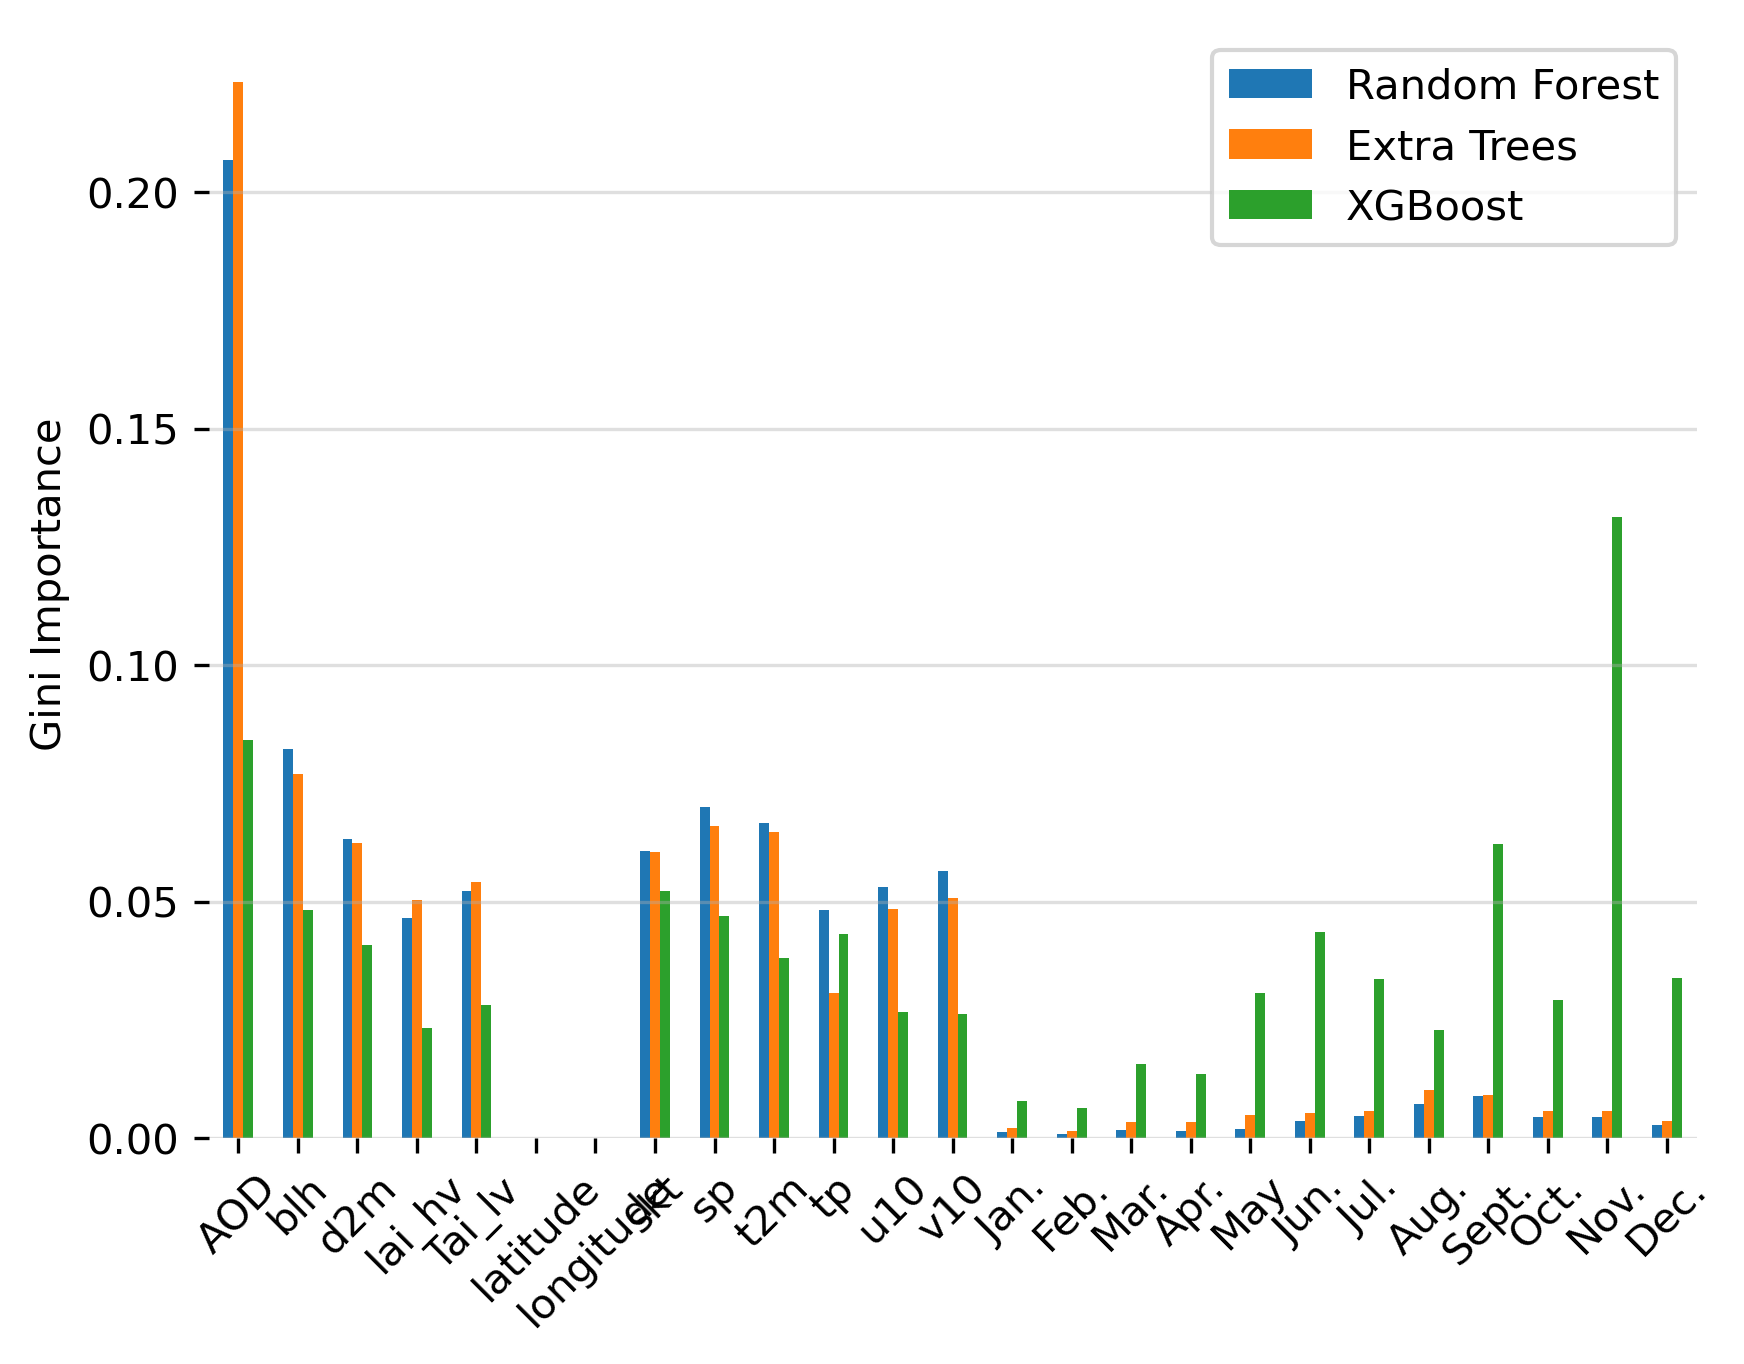

In [41]:
fig, ax = plt.subplots(dpi=300)

imps.plot.bar(rot=45, ax=ax)

ax.spines[:].set_visible(False)
ax.grid(alpha=0.4, axis='y')
ax.grid(visible=False, axis='x')
ax.set_ylabel("Gini Importance")

fig.savefig(f'{save_path}/importance-histograms.png', format='png', bbox_inches = "tight")

In [60]:
maxm = np.array([et_imp[:,0], rf_imp[:,0], xg_imp[:,0]]).ravel().astype(np.float32).max()
maxm = np.round(maxm*4)/4

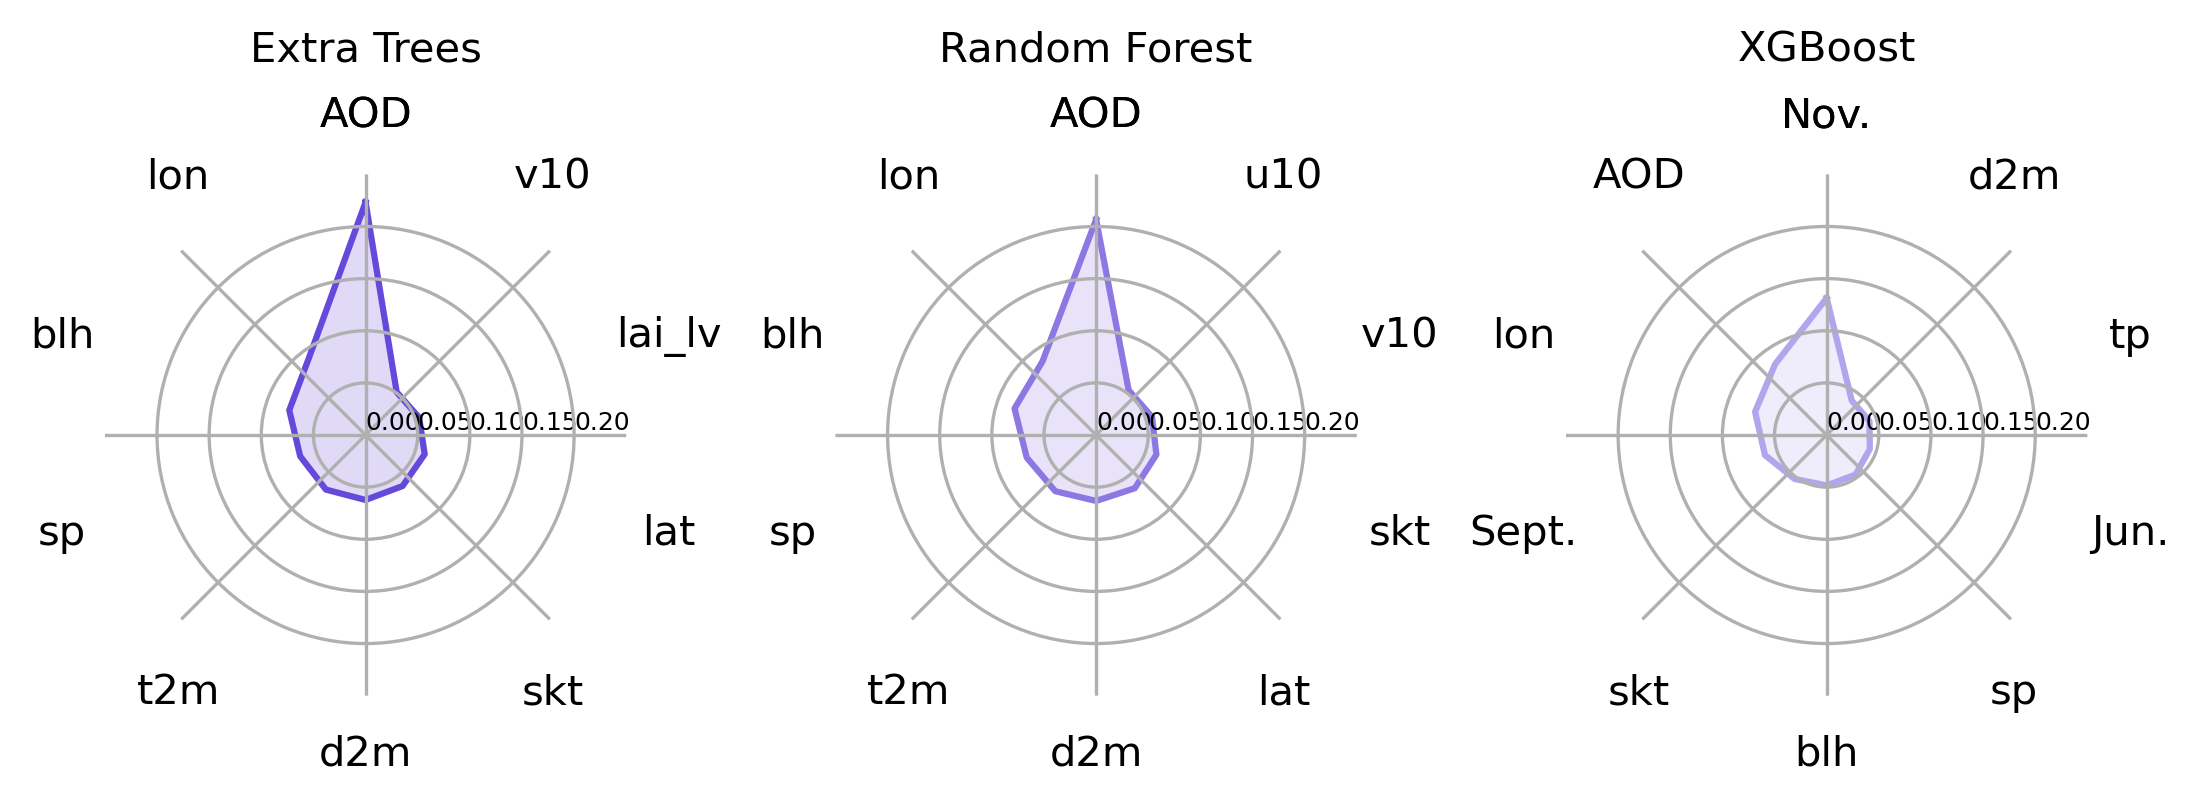

In [62]:
fig, axes = plt.subplots(1, 3, dpi=300, figsize=(8, 6), subplot_kw=dict(polar=True))

sz = 10
angles = np.linspace(0, 2*np.pi, sz, endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
radar_colors = [tree_color, lighten_color(tree_color, 0.75), lighten_color(tree_color, 0.5)]

lbls = []

for ax, imp, color in zip(axes.ravel(), [et_imp, rf_imp, xg_imp], radar_colors):
    sorter = np.argsort(imp[:,0].astype(float))[::-1]
    thing = imp[sorter][:sz]

    circular = np.concatenate((thing,[thing[0]]))
    vals = circular[:,0].astype(float)
    labels = [months.get(label, label) for label in circular[:,1]]
    lbls.append(labels)

    # uncomment if you want the importances to decrease in importance clockwise
    # ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi / 2.0)

    ax.plot(angles, vals, color=color)
    ax.fill(angles, vals, alpha=0.2, color=color)
    ax.tick_params(axis='y', which='major', labelsize=6)
    ax.set_rticks(np.arange(0.0, maxm, 0.05))
    ax.set_ylim([0,maxm])
    ax.set_rlabel_position(-90)
    ax.set_axisbelow(False)
    ax.set_xticklabels([])  # remove the xticks labels
    ax.tick_params(axis='y', size=6)
    ax.spines[:].set_visible(False)

fs = 10
y = 1.17
axes[0].set_title('Extra Trees', fontsize=fs, y=y)
axes[1].set_title('Random Forest', fontsize=fs, y=y)
axes[2].set_title('XGBoost', fontsize=fs, y=y)

fig.tight_layout(pad=5.0)

# put second axis on top of the first so that the
# feature labels will be above the grid and axis edge
# https://stackoverflow.com/a/73920746/5217293
for ax, labels in zip(axes.ravel(), lbls):
    ax2 = ax.figure.add_axes(ax.get_position(), polar=True, label=labels, frameon=False) 
    ax2.set_theta_offset(np.pi / 2.0) 
    ax2.set_yticklabels([])  # remove the yticks labels = rlabels
    ax2.set_thetagrids(np.rad2deg(angles), labels, fontsize='medium')
    ax2.set_ylim([0,maxm])
    ax2.grid(False)  # remove the grid of the 2nd axis
#     ax2.spines[:].set_edgecolor('gray')

fig.savefig(f'{save_path}/importances.png', format='png', bbox_inches = "tight")

In [ ]:
for thing, name in zip([rf_imp, et_imp, xg_imp], ['Random Forest', 'Extra Trees', 'XGBoost']):
    thing = thing[np.argsort(thing, axis=0)[:,0][::-1]]
    thing = pd.DataFrame({name: float(val) for val,name in thing}, index=['Importance']).T
    
    fig, ax = plt.subplots(dpi=300)
    ax.set_title(f'{name} Feature Importance')
    thing.plot(kind = "barh", legend = False, ax=ax)

    for patch in ax.patches:
        bl = patch.get_xy()
        x = patch.get_width() + bl[0] + .001
        y = 1*patch.get_height() + bl[1]
        ax.text(x, y, 
                f'{patch.get_width():0.2f}', 
                fontsize=8, 
                ha='left',
                va='bottom')

    ax.invert_yaxis()
    fig.savefig(f'{save_path}/{name.replace(" ", "_").lower()}_feature_importance.png', format='png', bbox_inches = "tight")
    

## Learning Curves

In [151]:
def learning_curve_graph(train_sizes, train_scores, test_scores, ax = None,
                        train_color = 'blue', test_color='green', prefix=''):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    if not ax:
        fig, ax = plt.subplots(dpi=300)

    ax.plot(train_sizes, train_mean,
             color=test_color, marker='o',
             markersize=5, label=f'{prefix}Training $R^2$')

    ax.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color=test_color)

    ax.plot(train_sizes, test_mean,
             color=train_color, linestyle='--',
             marker='s', markersize=5,
             label=f'{prefix}Validation $R^2$')

    ax.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color=train_color)

    ax.grid(True)
    ax.set_xlabel('Number of training examples')
    ax.set_ylabel('$R^2$')
    ax.legend(loc='lower right')
    ax.set_ylim([0.0, 1.03])
    
    return fig, ax

In [123]:
train_sizes = np.linspace(0.05, 1.0, 20)

In [38]:
et_res = learning_curve(estimator=mc.models['Extra Trees'],
       X=X_train,
       y=y_train,
       train_sizes=train_sizes,
       cv=5,
       n_jobs=-1)

/usr/local/Caskroom/miniconda/base/envs/geospatial/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [47]:
from pickle import dump, HIGHEST_PROTOCOL
with open(f'{save_path}/learning_curve_extra_trees.pcl', 'wb') as handle:
    dump(et_res, handle, protocol=HIGHEST_PROTOCOL)

In [9]:
from pickle import load
with open(f'{save_path}/../default_models/learning_curve_extra_trees.pcl', 'rb') as handle:
    et_res = load(handle)

In [124]:
mlp_res = learning_curve(estimator=mc.models['MLP'],
                   X=X_train,
                   y=y_train,
                   train_sizes=train_sizes,
                   cv=5,
                   n_jobs=-1)

/usr/local/Caskroom/miniconda/base/envs/geospatial/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [125]:
from pickle import dump, HIGHEST_PROTOCOL
with open(f'{save_path}/learning_curve_mlp.pcl', 'wb') as handle:
    dump(mlp_res, handle, protocol=HIGHEST_PROTOCOL)

In [10]:
from pickle import load
with open(f'{save_path}/../default_models/learning_curve_mlp.pcl', 'rb') as handle:
    mlp_res = load(handle)

In [22]:
lin_cv_res = learning_curve(estimator=mc.models['Linear Regression'],
                   X=X_train,
                   y=y_train,
                   train_sizes=train_sizes,
                   cv=5,
                   n_jobs=-1)

/usr/local/Caskroom/miniconda/base/envs/geospatial/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
from pickle import dump, HIGHEST_PROTOCOL
with open(f'{save_path}/learning_curve_linear_regular_cv.pcl', 'wb') as handle:
    dump(lin_cv_res, handle, protocol=HIGHEST_PROTOCOL)

In [11]:
from pickle import load
with open(f'{save_path}/../default_models/learning_curve_linear_regular_cv.pcl', 'rb') as handle:
    lin_cv_res = load(handle)

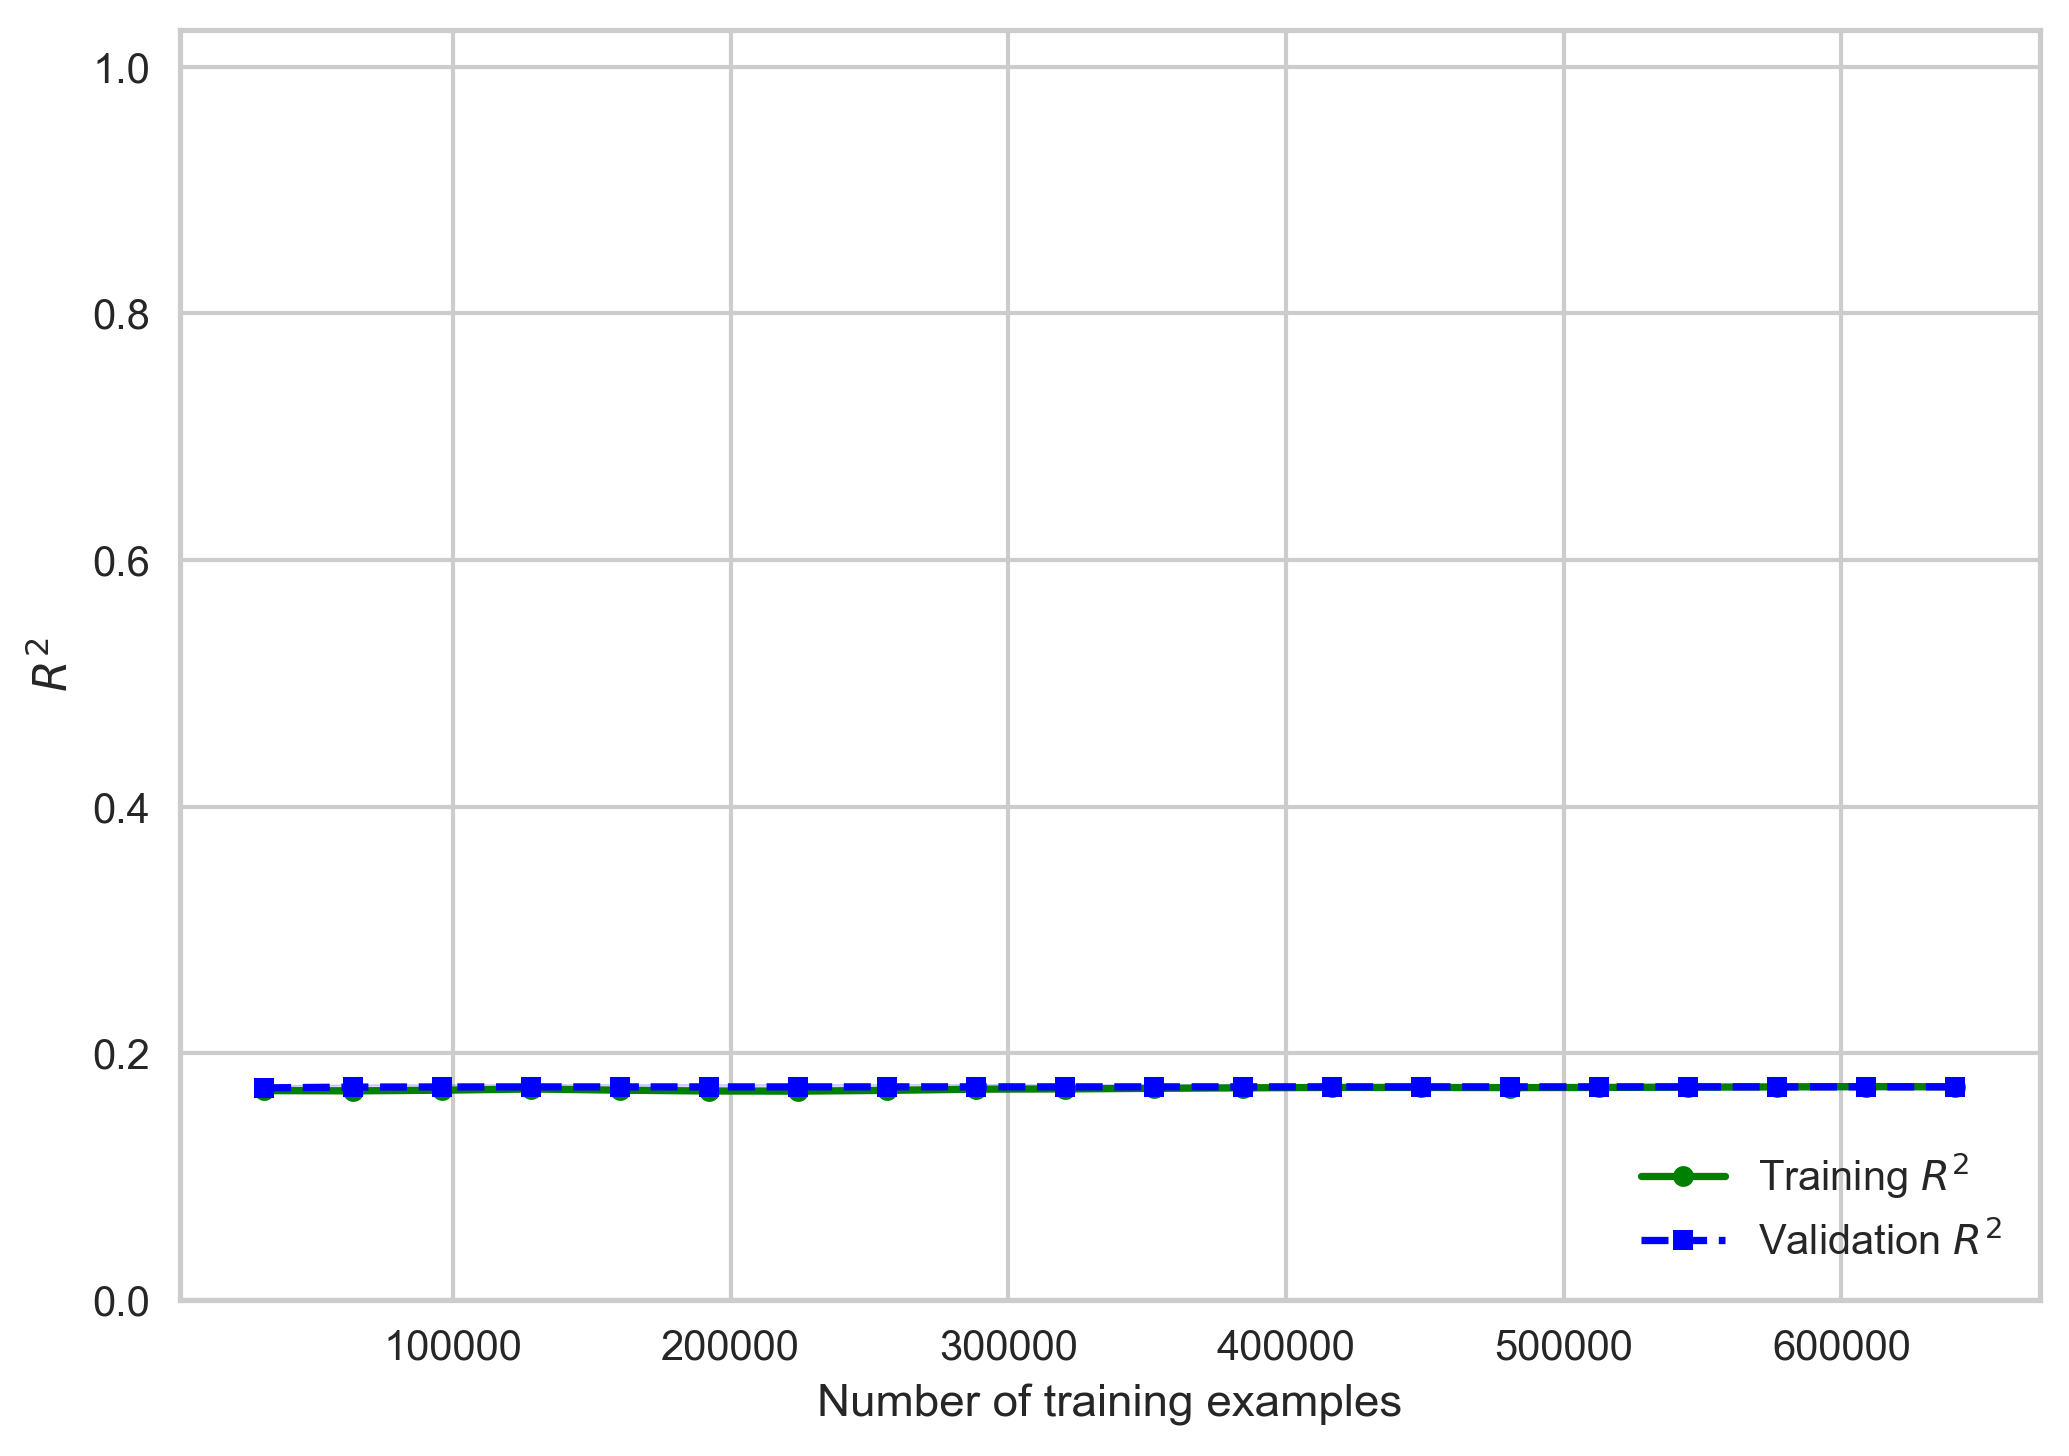

In [129]:
fig, ax = learning_curve_graph(*lin_cv_res)

fig.savefig(f'{save_path}/learning-curve-linear-regular-cv.png', format='png', bbox_inches = "tight")

In [33]:
lin_spatial_cv = learning_curve(estimator=mc.models['Linear Regression'],
                   X=X_train,
                   y=y_train,
                   train_sizes=train_sizes,
                   cv=gkf,
                   n_jobs=-1)

/usr/local/Caskroom/miniconda/base/envs/geospatial/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [44]:
from pickle import dump, HIGHEST_PROTOCOL
with open(f'{save_path}/learning_curve_linear_spatial_cv.pcl', 'wb') as handle:
    dump(lin_spatial_cv, handle, protocol=HIGHEST_PROTOCOL)

In [12]:
def segment(train_sizes, train_scores, test_scores, ax = None, color='green', fill_alpha=0.15):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    ax.plot(train_sizes, train_mean,
             color=color, marker='o',
             markersize=5)

    ax.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=fill_alpha, color=color)

    ax.plot(train_sizes, test_mean,
             color=lighten_color(color, 0.5), linestyle='--',
             marker='s', markersize=5)

    ax.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=fill_alpha, color=lighten_color(color, 0.5))

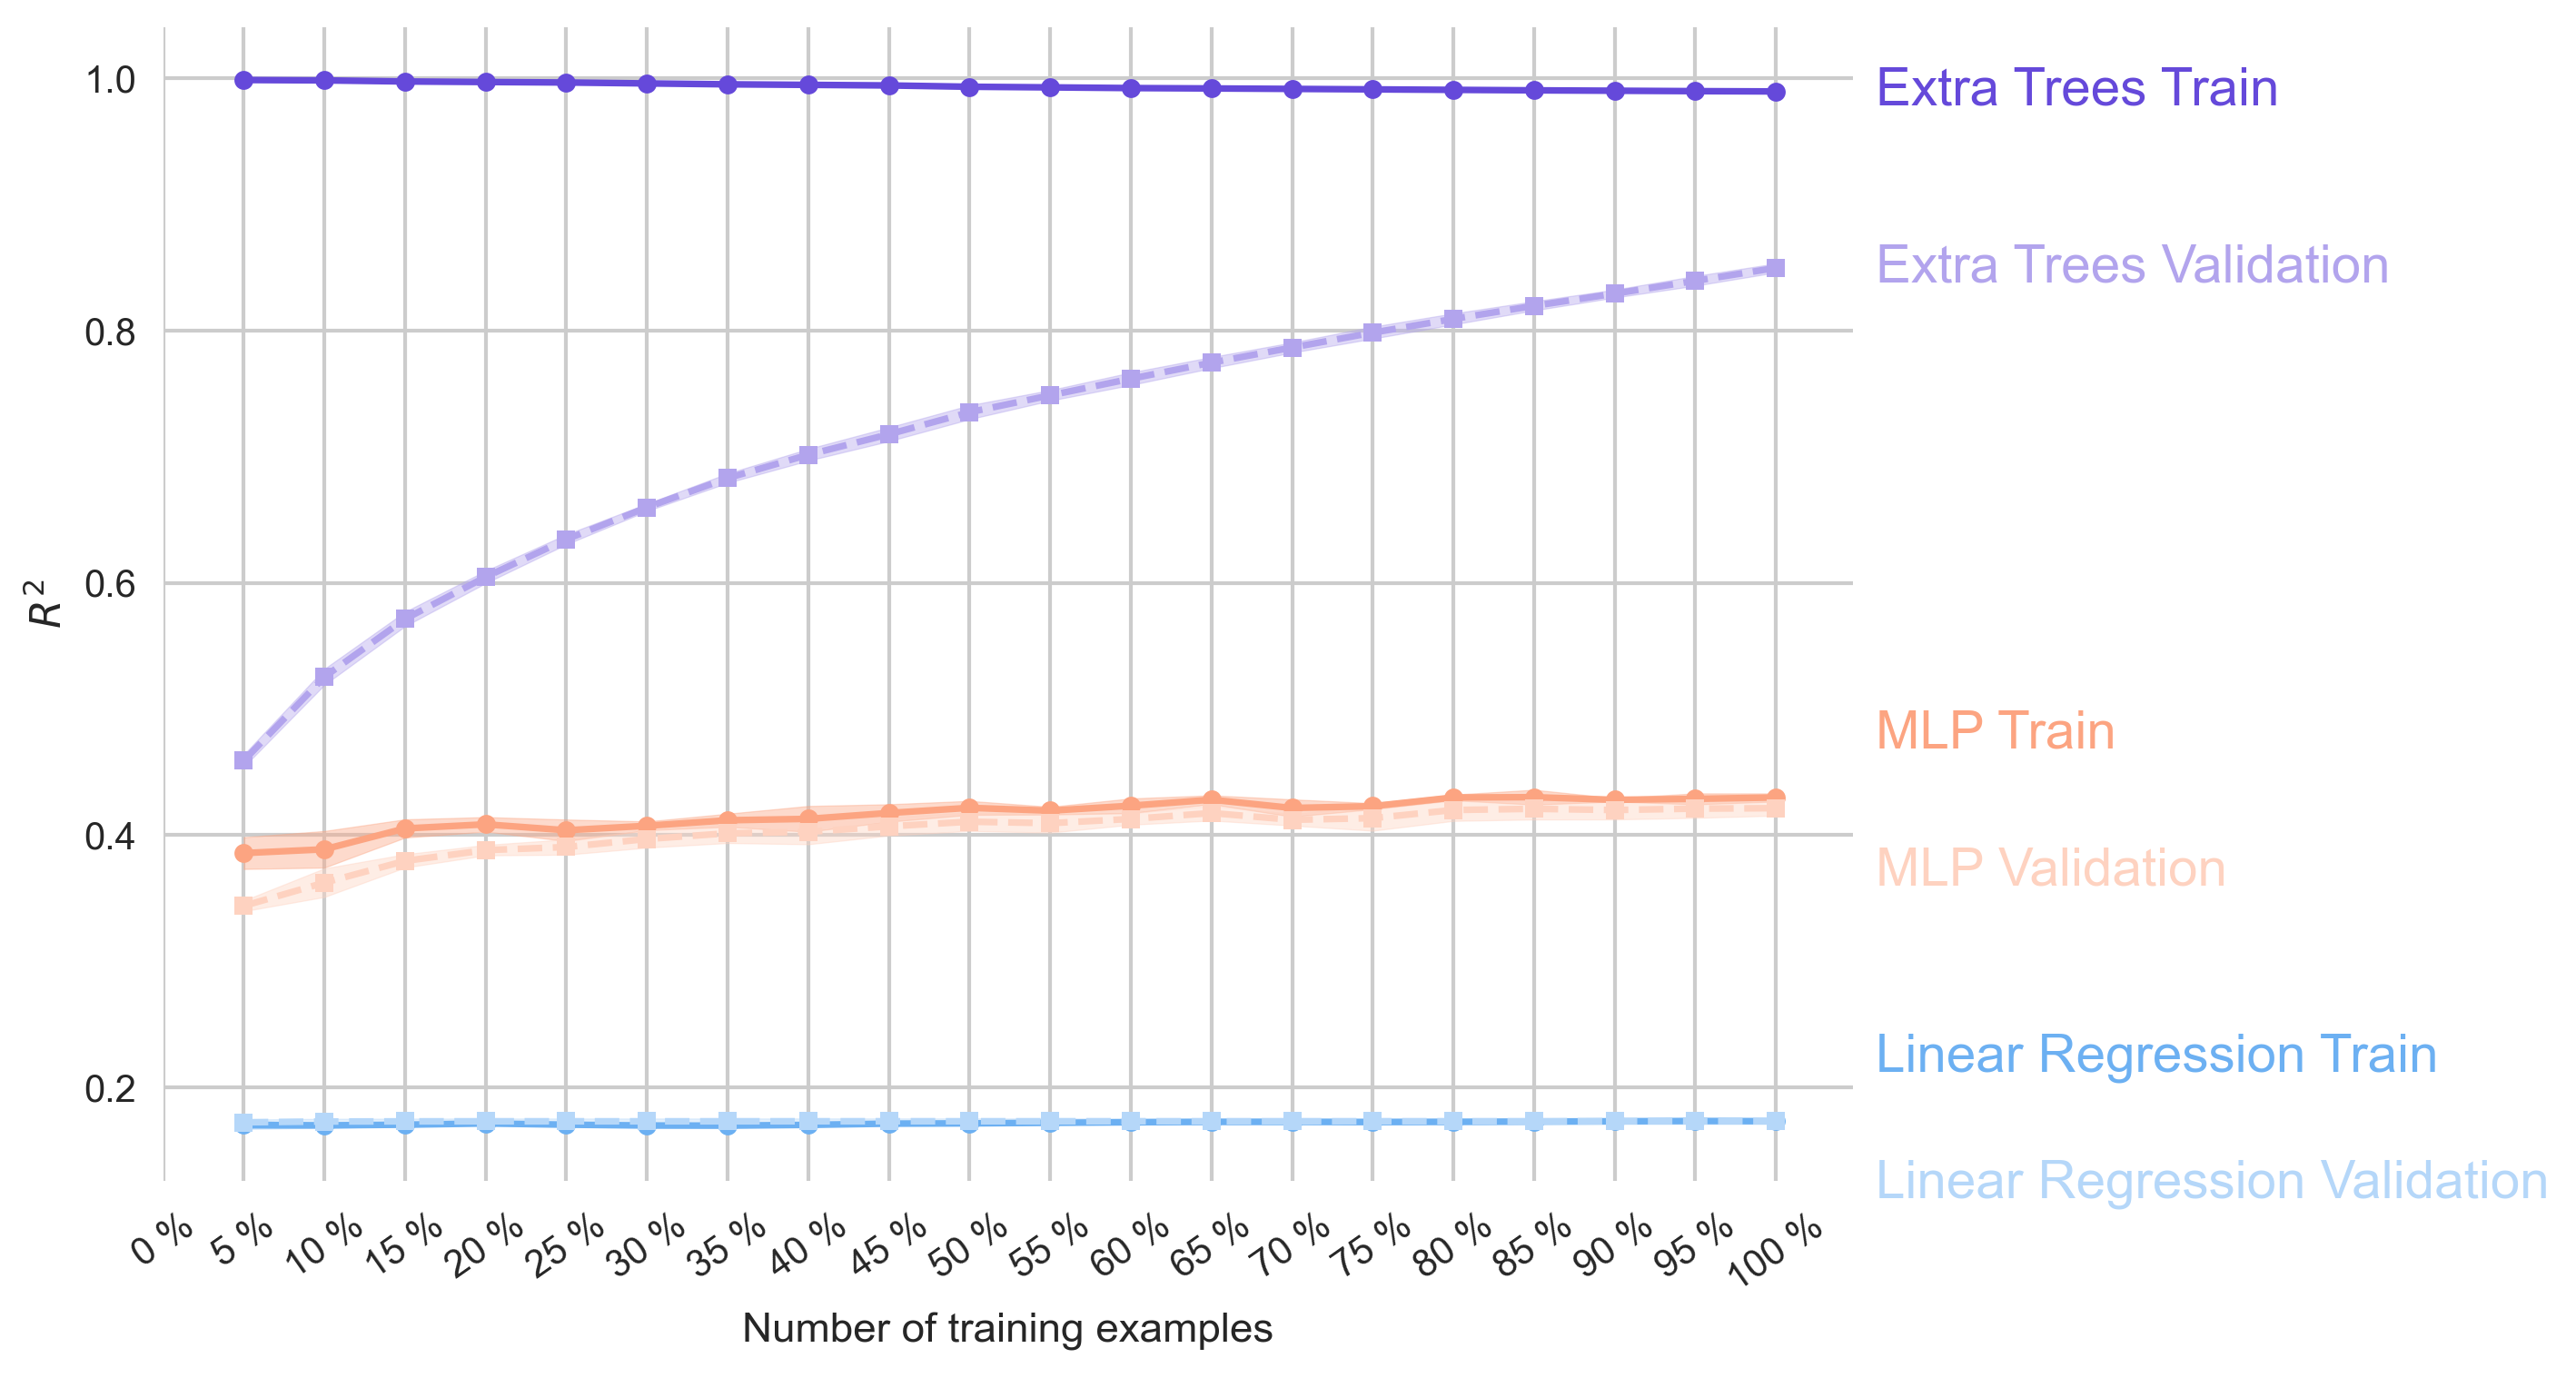

In [30]:
fig, ax = plt.subplots(dpi=300)

fill_alpha = .4
segment(*et_res,     ax=ax, color=tree_color, fill_alpha=fill_alpha)
segment(*mlp_res,    ax=ax, color=nn_color, fill_alpha=fill_alpha)
segment(*lin_cv_res, ax=ax, color=linear_color, fill_alpha=fill_alpha)

names = [
    'Extra Trees Train', 
    'Extra Trees Validation', 
    'MLP Train', 
    'MLP Validation', 
    'Linear Regression Train',
    'Linear Regression Validation']

dy = 0.05
offsets = [0, 0, dy, -dy, dy, -dy]

for line, name, offset in zip(ax.lines, names, offsets):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y+offset), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

percentages = [0] + np.round((et_res[0] / 640892) * 100, 0).tolist()
ax.set_xticks([0] + et_res[0].tolist())
ax.set_xticklabels([f'{int(i)} %' for i in percentages], rotation=35)
    
ax.grid(True)
ax.set_xlabel('Number of training examples')
ax.set_ylabel('$R^2$')
ax.spines[:].set_visible(False)

fig.savefig(f'{save_path}/learning_curves.png', format='png', bbox_inches = "tight")

## Sequential Feature Inclusion

In [63]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

[based off of this](https://machinelearningmastery.com/rfe-feature-selection-in-python/), but used a [sequential feature selector instead](https://scikit-learn.org/stable/modules/feature_selection.html#sequential-feature-selection)

In [67]:
def get_models(estimator, max_features = 10, cv = 5):
    models = dict()
    for i in range(1, max_features):
        rfe = SequentialFeatureSelector(estimator=estimator, n_features_to_select=i, cv=cv)
        model = estimator
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

def evaluate_model(model, X, y, cv = 5):
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores

def get_results(model, n_feautres, X_train, y_train, cv=5):
    models = get_models(model, max_features=n_feautres, cv=cv)
    results, names = list(), list()
    
    pbar = tqdm(models.items())
    for name, model in pbar:
        pbar.set_description(name)
        scores = evaluate_model(model, X_train, y_train, cv=cv)
        results.append(scores)
        names.append(name)
        
    return results, names, models

In [68]:
lin_results, lin_names, models = get_results(mc.models['Linear Regression'], X.shape[1], X_train, y_train)

  0%|          | 0/24 [00:00<?, ?it/s]

/usr/local/Caskroom/miniconda/base/envs/test/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [70]:
selected_features = {}

for k, v in models.items():
    v.fit(X_train, y_train)
    selected_features[k] = X.columns[v['s'].support_]

In [71]:
selected_features = {k: v.tolist() for k, v in selected_features.items()}

In [72]:
added_feature = []

last_features = []
for i in range(1, len(selected_features.keys())+1):
    i = str(i)
    last_added = set(selected_features[i]).difference(last_features)
    added_feature += list(last_added)
    last_features = selected_features[i]

In [73]:
from pickle import dump, HIGHEST_PROTOCOL
with open(f'{save_path}/sequential_features_linear.pcl', 'wb') as handle:
    dump([lin_results, lin_names, added_feature, models], handle, protocol=HIGHEST_PROTOCOL)

In [89]:
from pickle import load
with open(f'{save_path}/sequential_features_linear.pcl', 'rb') as handle:
    [lin_results, lin_names, added_feature_lin, models] = load(handle)

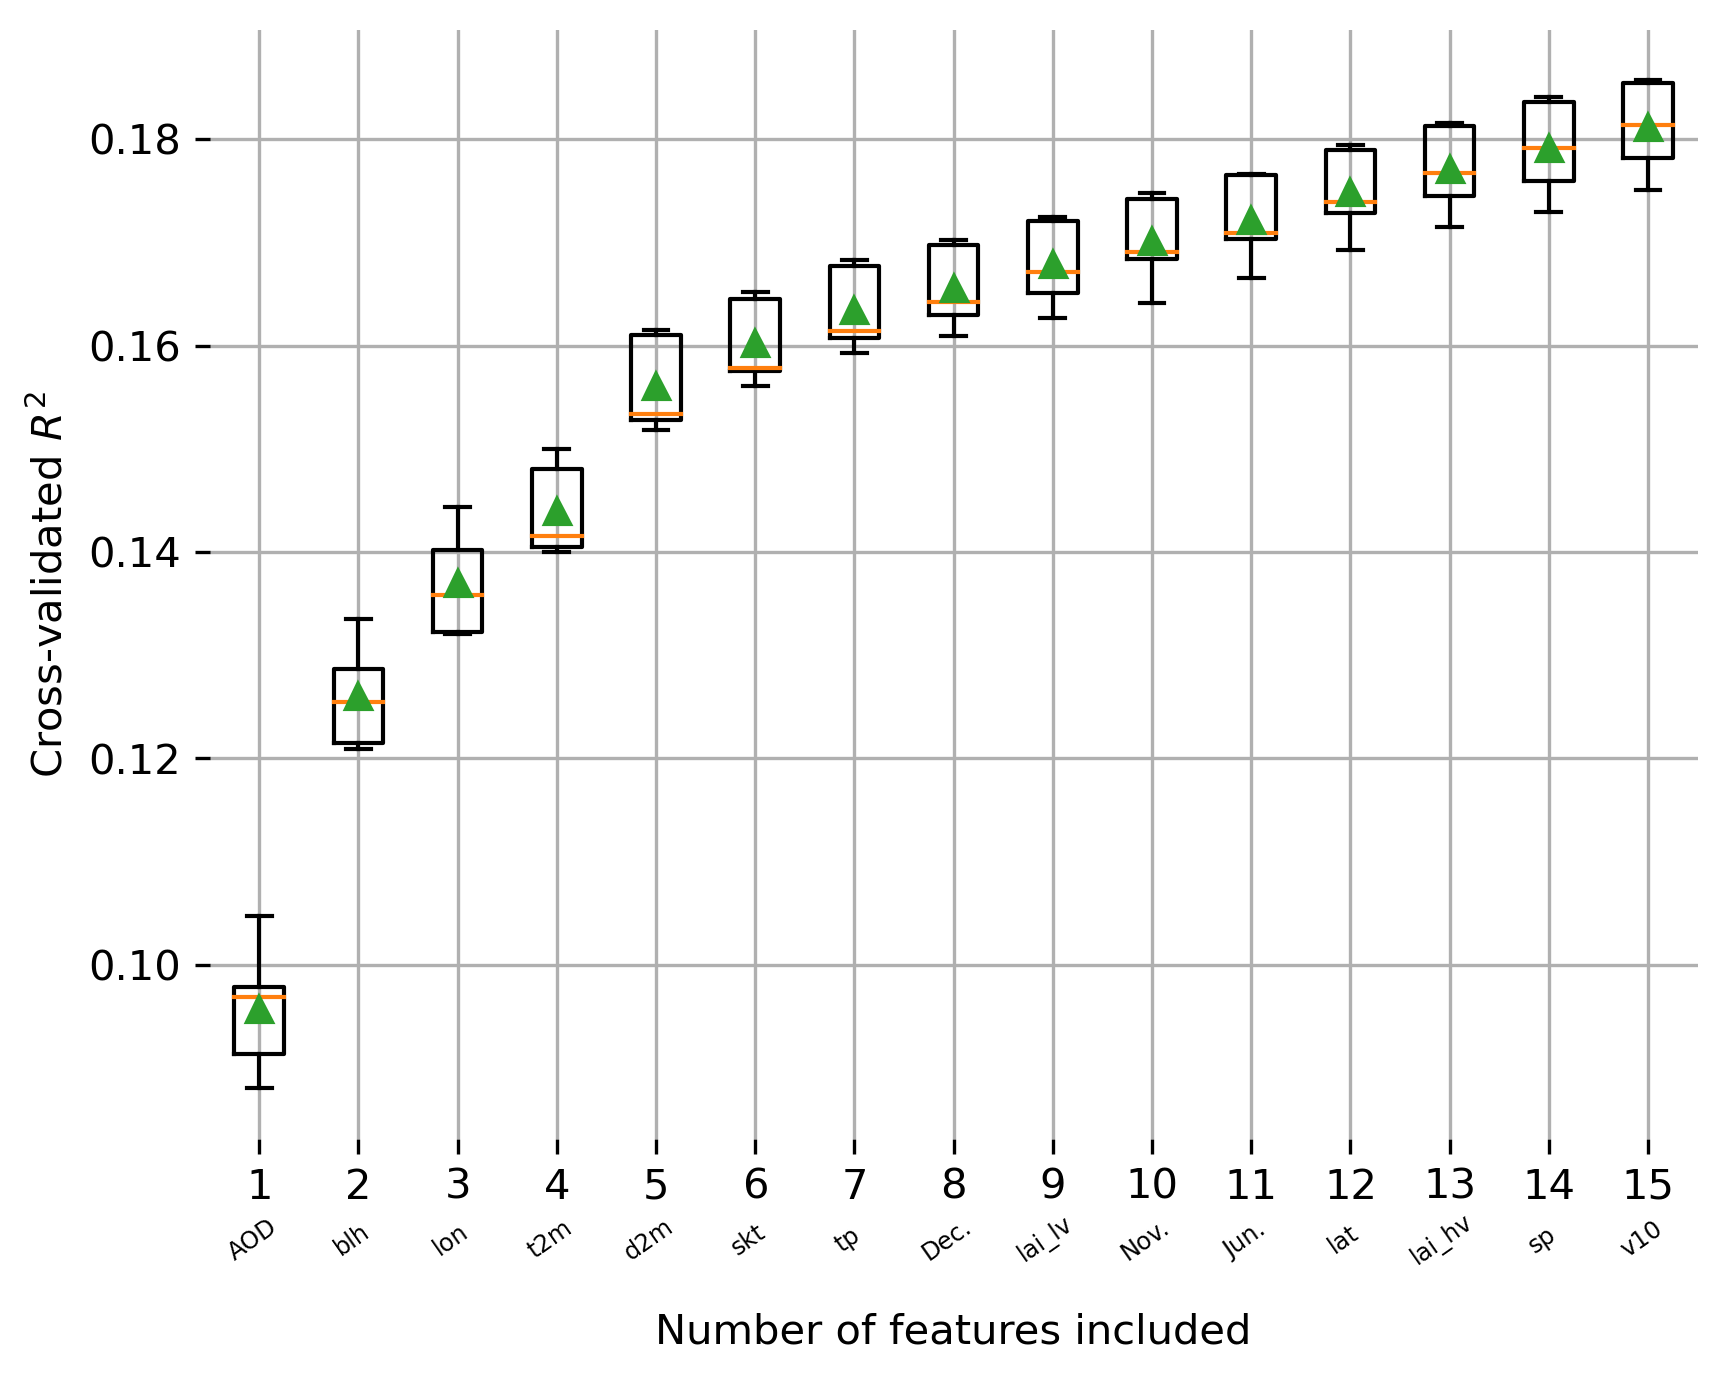

In [75]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots(dpi=300)

ax.set_xlabel('Number of features included', labelpad=25)
ax.set_ylabel('Cross-validated $R^2$')

ax.boxplot(lin_results[:15], labels=lin_names[:15], showmeans=True);

trans = transforms.blended_transform_factory(
    ax.transData, ax.transAxes)

for idx, addition in enumerate(added_feature[:15]):
    addition = months.get(addition, addition)
    ax.text(idx+1, -.1, addition, va='bottom', ha='center',
    rotation=35, rotation_mode='anchor', size='xx-small',
    transform=trans)

ax.spines[:].set_visible(False)
ax.grid()

fig.savefig(f'{save_path}/sequential_features_linear.png', format='png', bbox_inches = "tight")

In [76]:
et_imp_sorted = et_imp[np.argsort(et_imp, axis=0)[:,0][::-1]]
columns = X.columns.tolist()

In [77]:
included = []
added_feature = []
for a in et_imp_sorted[:,1]:
    included.append(columns.index(a))
    added_feature.append(a)

In [84]:
included = []
et_results = []
for a in et_imp_sorted[:,1]:
    included.append(columns.index(a))
    mc.x = X_train[:,np.array(included)]
    res = mc.compute_cross_validation_for_model('Extra Trees')
    et_results.append(res['Extra Trees'])

/usr/local/Caskroom/miniconda/base/envs/test/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [85]:
from pickle import dump, HIGHEST_PROTOCOL
with open(f'{save_path}/sequential_features_extra_trees.pcl', 'wb') as handle:
    dump([et_results, added_feature], handle, protocol=HIGHEST_PROTOCOL)

In [92]:
from pickle import load
with open(f'{save_path}/sequential_features_extra_trees.pcl', 'rb') as handle:
    [et_results, added_feature_et] = load(handle)

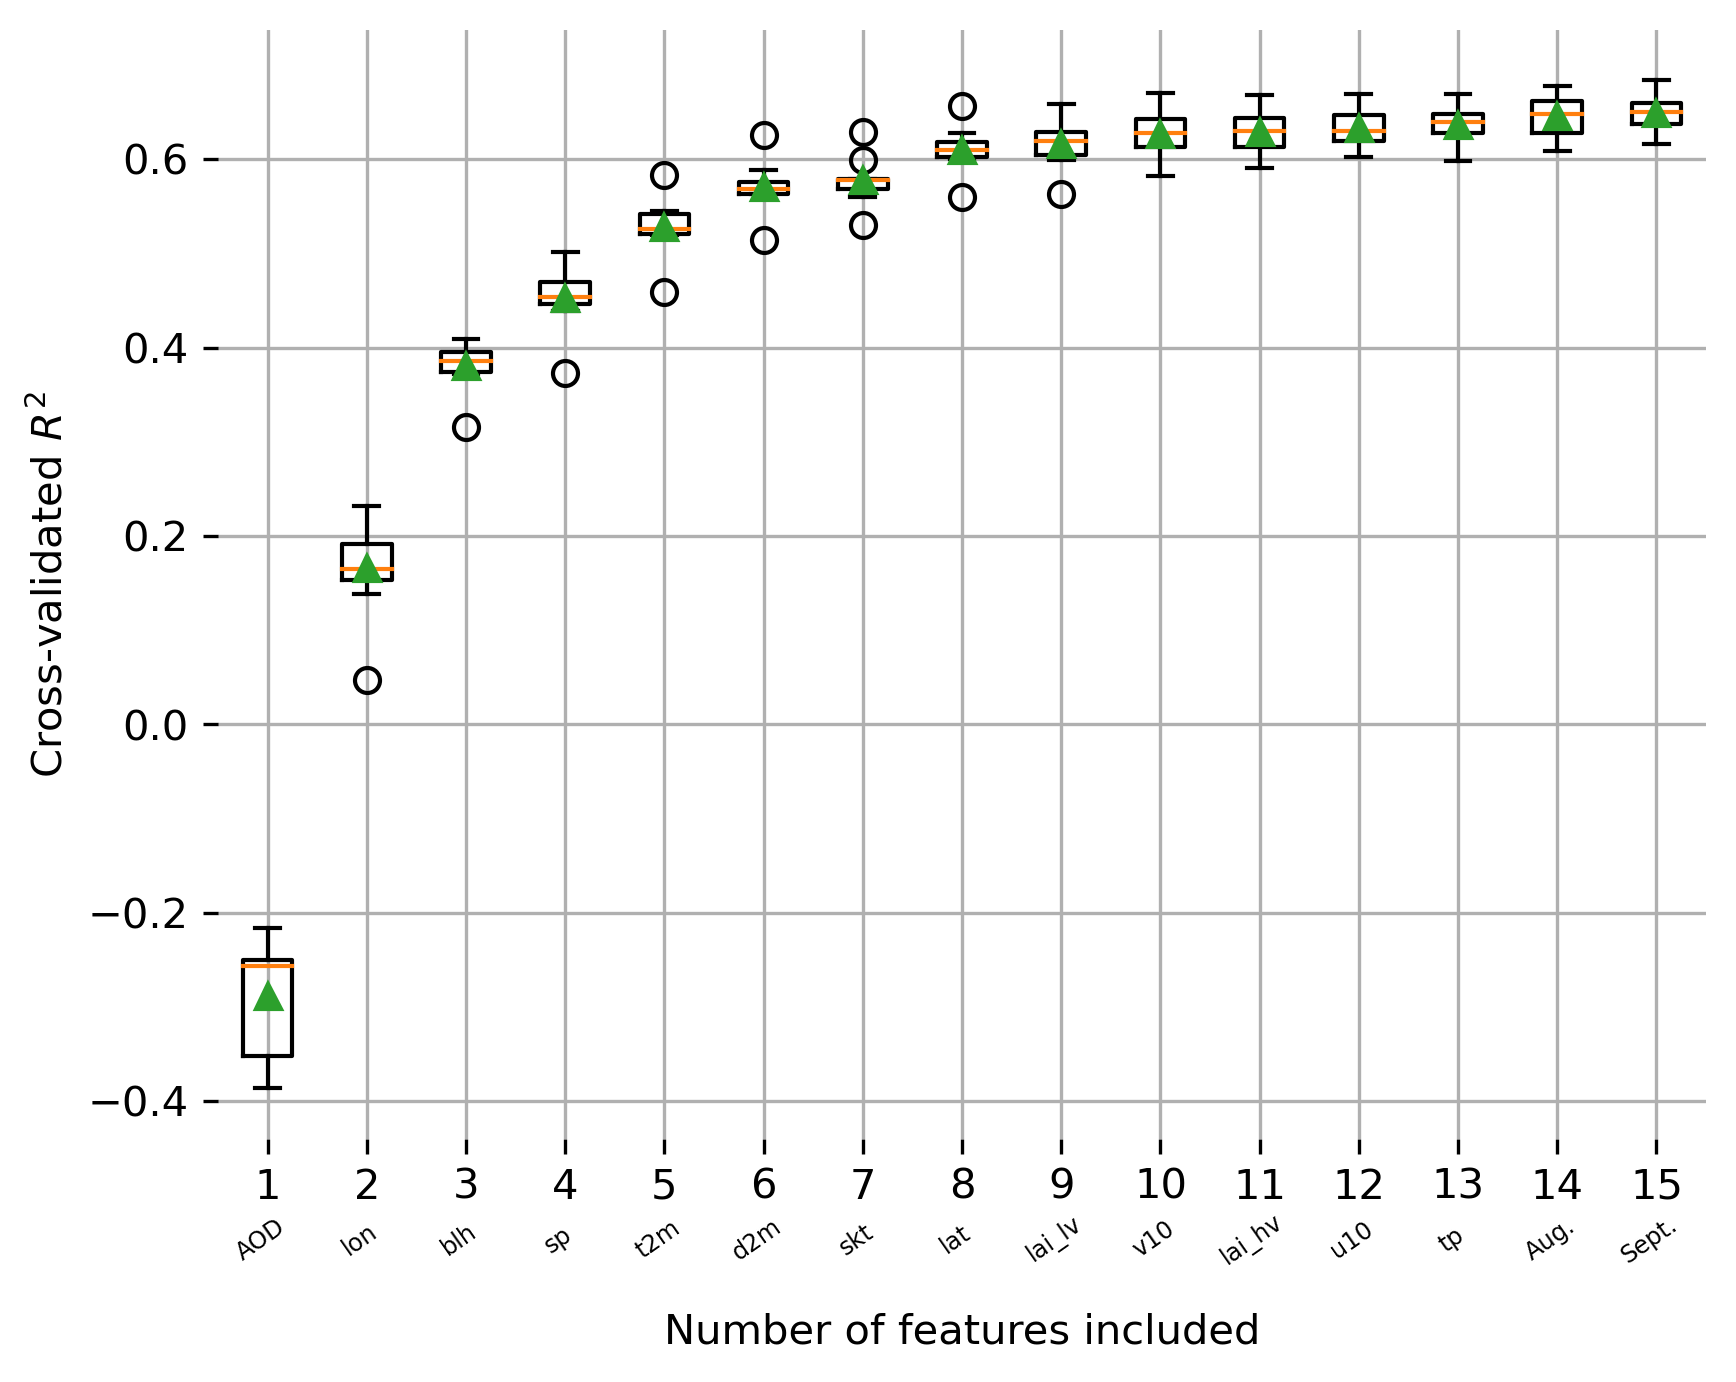

In [87]:
import matplotlib.transforms as transforms

fig, ax = plt.subplots(dpi=300)

ax.set_xlabel('Number of features included', labelpad=25)
ax.set_ylabel('Cross-validated $R^2$')

ax.boxplot([i['test_r2'] for i in et_results][:15], labels=range(1, len(et_results)+1)[:15], 
   showmeans=True,
#     boxprops={"color": tree_color,"linewidth": 0.5},
#     whiskerprops={"color": tree_color, "linewidth": 1.5},
#     capprops={"color": tree_color, "linewidth": 1.5}
)

# ax.boxplot(lin_results[:20], labels=lin_names[:20], showmeans=True);

trans = transforms.blended_transform_factory(
    ax.transData, ax.transAxes)

for idx, addition in enumerate(added_feature[:15]):
    addition = months.get(addition, addition)
    ax.text(idx+1, -.1, addition, va='bottom', ha='center',
    rotation=35, rotation_mode='anchor', size='xx-small',
    transform=trans)

ax.spines[:].set_visible(False)
ax.grid()

fig.savefig(f'{save_path}/sequential_features_extra_trees.png', format='png', bbox_inches = "tight")

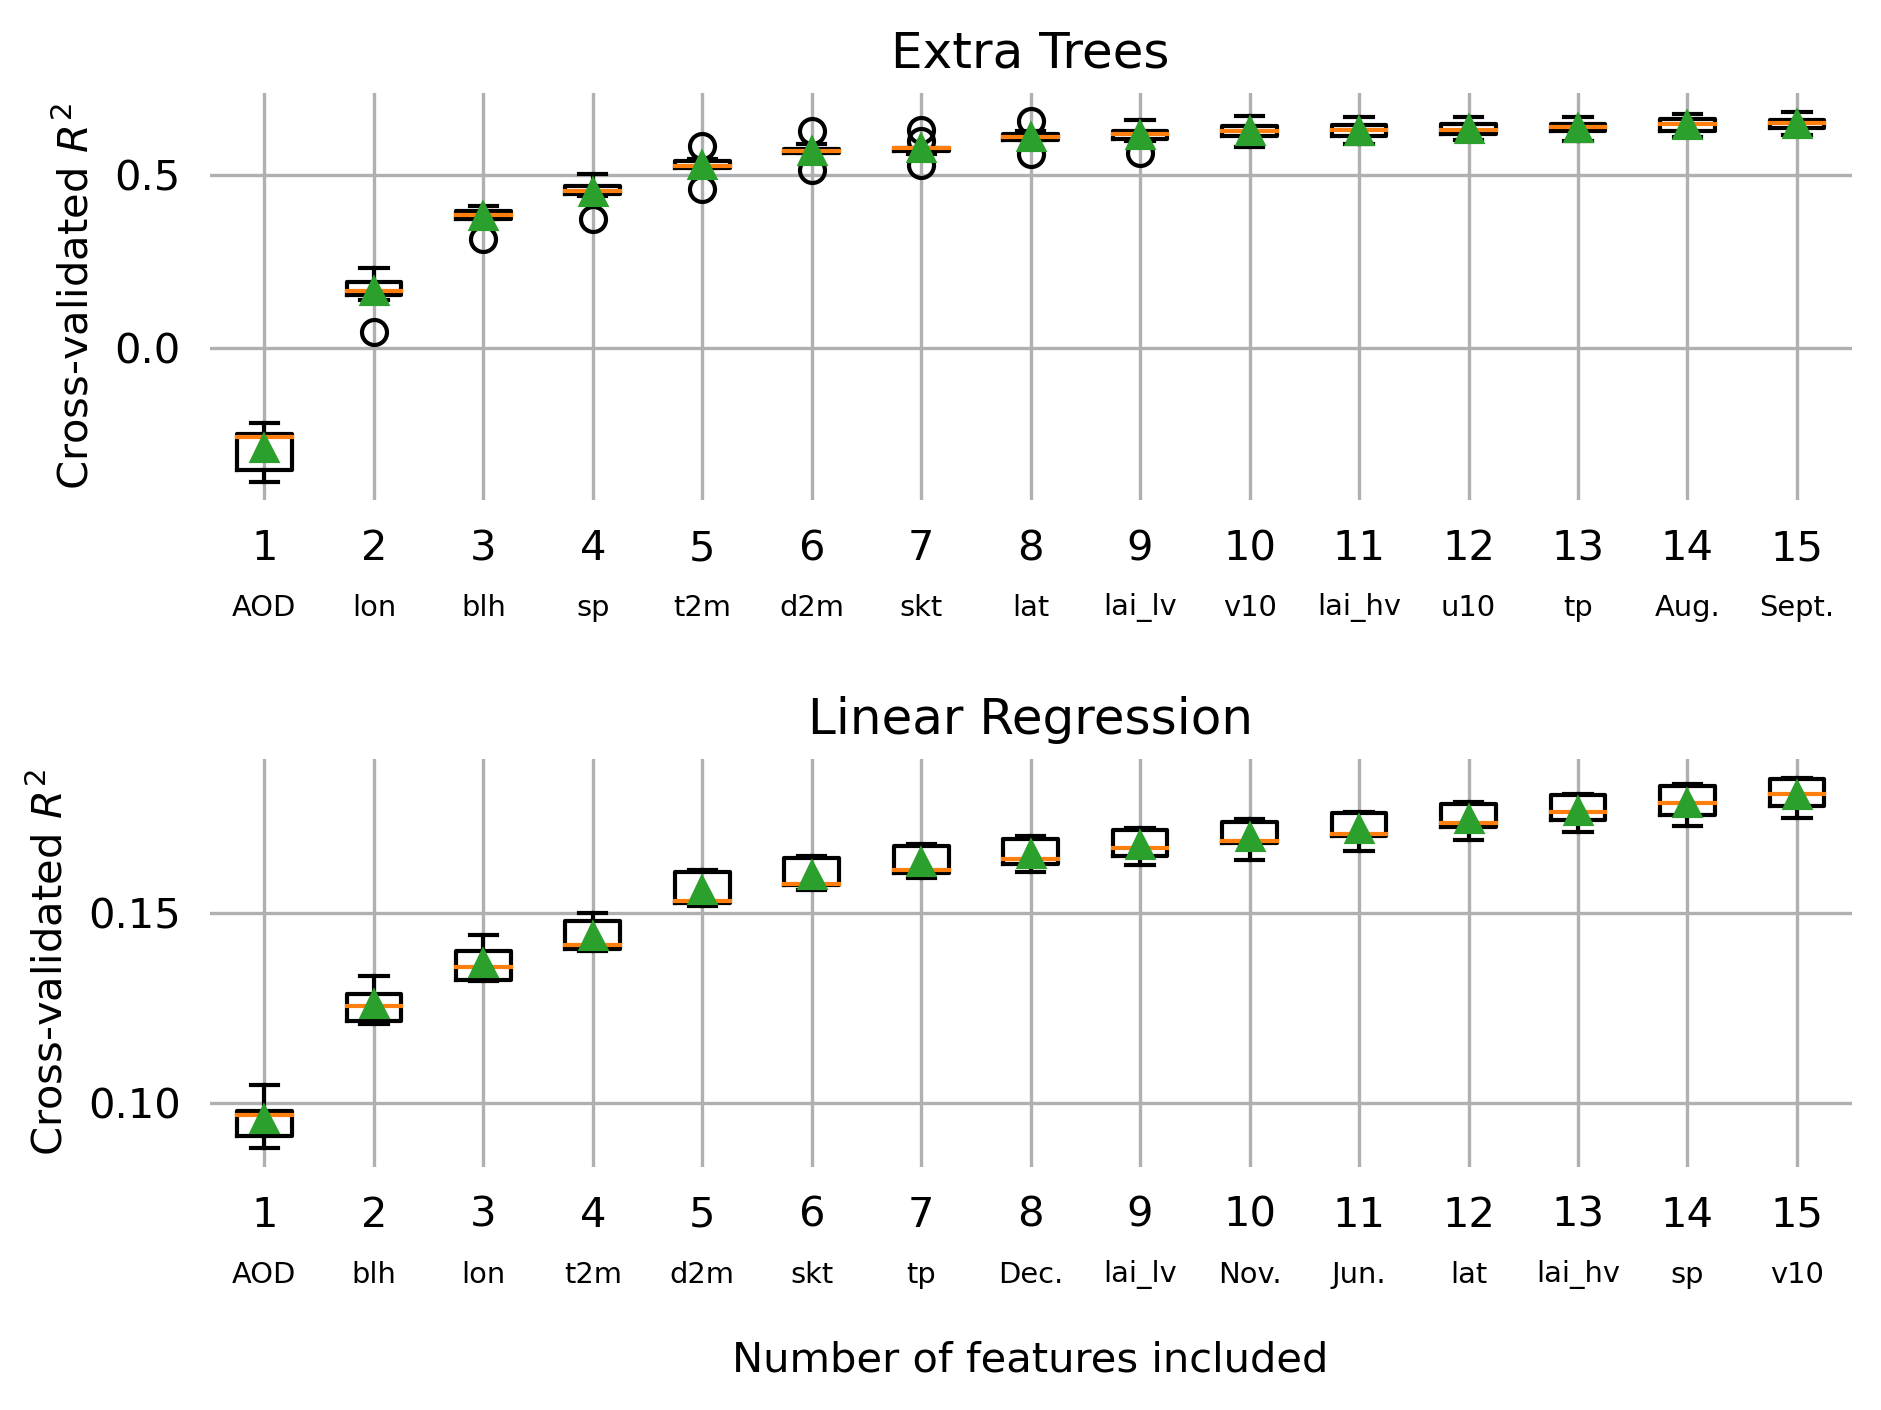

In [96]:
import matplotlib.transforms as transforms

fig, axes = plt.subplots(2, 1, dpi=300)

(ax1, ax2) = axes

limit = 15

ax1.boxplot([i['test_r2'] for i in et_results][:limit], labels=range(1, len(et_results)+1)[:limit], showmeans=True)
ax1.set_title("Extra Trees")

ax2.boxplot(lin_results[:limit], labels=lin_names[:limit], showmeans=True);
ax2.set_title("Linear Regression")

for ax, added_feature in zip(axes, [added_feature_et, added_feature_lin]):
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    
    for idx, addition in enumerate(added_feature[:15]):
        addition = months.get(addition, addition)
        y = -0.3
#         if addition == 'latitude':
#             y -= 0.13
        ax.text(idx+1, y, addition, va='bottom', ha='center',
        rotation=0, rotation_mode='anchor', size='x-small',
        transform=trans)

    ax.spines[:].set_visible(False)
    ax.set_ylabel('Cross-validated $R^2$')
    ax.grid()
    ax.tick_params(which='both', width=0)
    
ax2.set_xlabel('Number of features included', labelpad=25)
    
fig.tight_layout()
    
fig.savefig(f'{save_path}/sequential_features_combined.png', format='png', bbox_inches = "tight")